In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv('../../Data/course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [3]:
# Calculate click through rate for each group:
control_ctr = df.query('group == "control"')
control_ctr = control_ctr.query('action == "enroll"')['id'].nunique() / control_ctr['id'].nunique()
print('control_ctr: ', control_ctr)

experiment_ctr = df.query('group == "experiment"')
experiment_ctr = experiment_ctr.query('action == "enroll"')['id'].nunique() / experiment_ctr['id'].nunique()
print('experiment_ctr: ', experiment_ctr)

# Calculate the observed difference in click through rates:
obs_diff = experiment_ctr - control_ctr
print('obs_diff: ', obs_diff)

control_ctr:  0.19240636223704463
experiment_ctr:  0.21115921115921116
obs_diff:  0.018752848922166526


(array([  13.,  130.,  524., 1467., 2518., 2789., 1741.,  644.,  144.,
          30.]),
 array([-0.01673284, -0.00975094, -0.00276904,  0.00421286,  0.01119476,
         0.01817666,  0.02515855,  0.03214045,  0.03912235,  0.04610425,
         0.05308615]),
 <BarContainer object of 10 artists>)

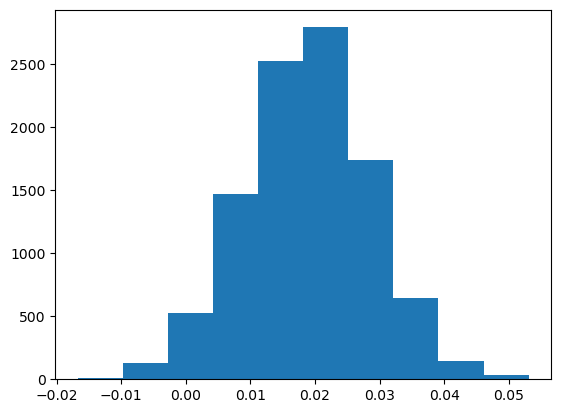

In [4]:
# Create a sampling distribution of the difference in proportions:
diffs = []
for _ in range(10000):
    bootsamp = df.sample(df.shape[0], replace=True)
    control_ctr = bootsamp.query('group == "control"')
    experiment_ctr = bootsamp.query('group == "experiment"')
    control_ctr = control_ctr.query('action == "enroll"')['id'].nunique() / control_ctr['id'].nunique()
    experiment_ctr = experiment_ctr.query('action == "enroll"')['id'].nunique() / experiment_ctr['id'].nunique()
    diffs.append(experiment_ctr - control_ctr)

plt.hist(diffs)

p-value:  0.0242


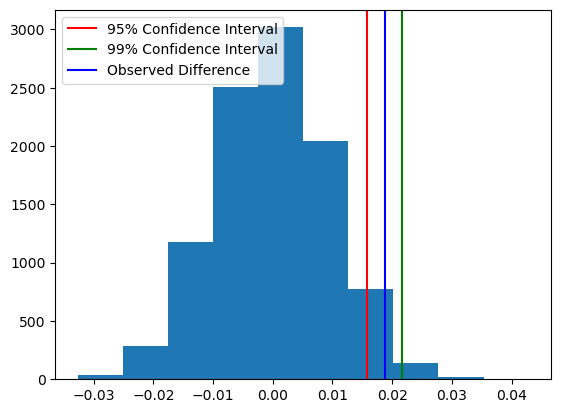

In [5]:
# Simulate the distribution under the null hypothesis:
null_vals = np.random.normal(0, np.std(diffs), 10000)
print('p-value: ', (null_vals > obs_diff).mean())

plt.hist(null_vals)
plt.axvline(x=np.percentile(null_vals, 95), color='red')
plt.axvline(x=obs_diff, color='blue')
plt.legend(('95% Confidence Interval', '99% Confidence Interval', 'Observed Difference'))
plt.show()

With a p-value less than 0.05, it seems unlikely that our statistics is from the null. Thus, our finding is significant, and we reject the $H_0$. We, therefore, implement the change.